0.41467 simple_step_2021-Feb-03-15:50:10.log
0.3469 simple_step_2021-Feb-03-21:43:24.log
0.29515 simple_step_2021-Feb-03-10:04:12.log


Text(0.5, 1.0, 'avg vs fittest')

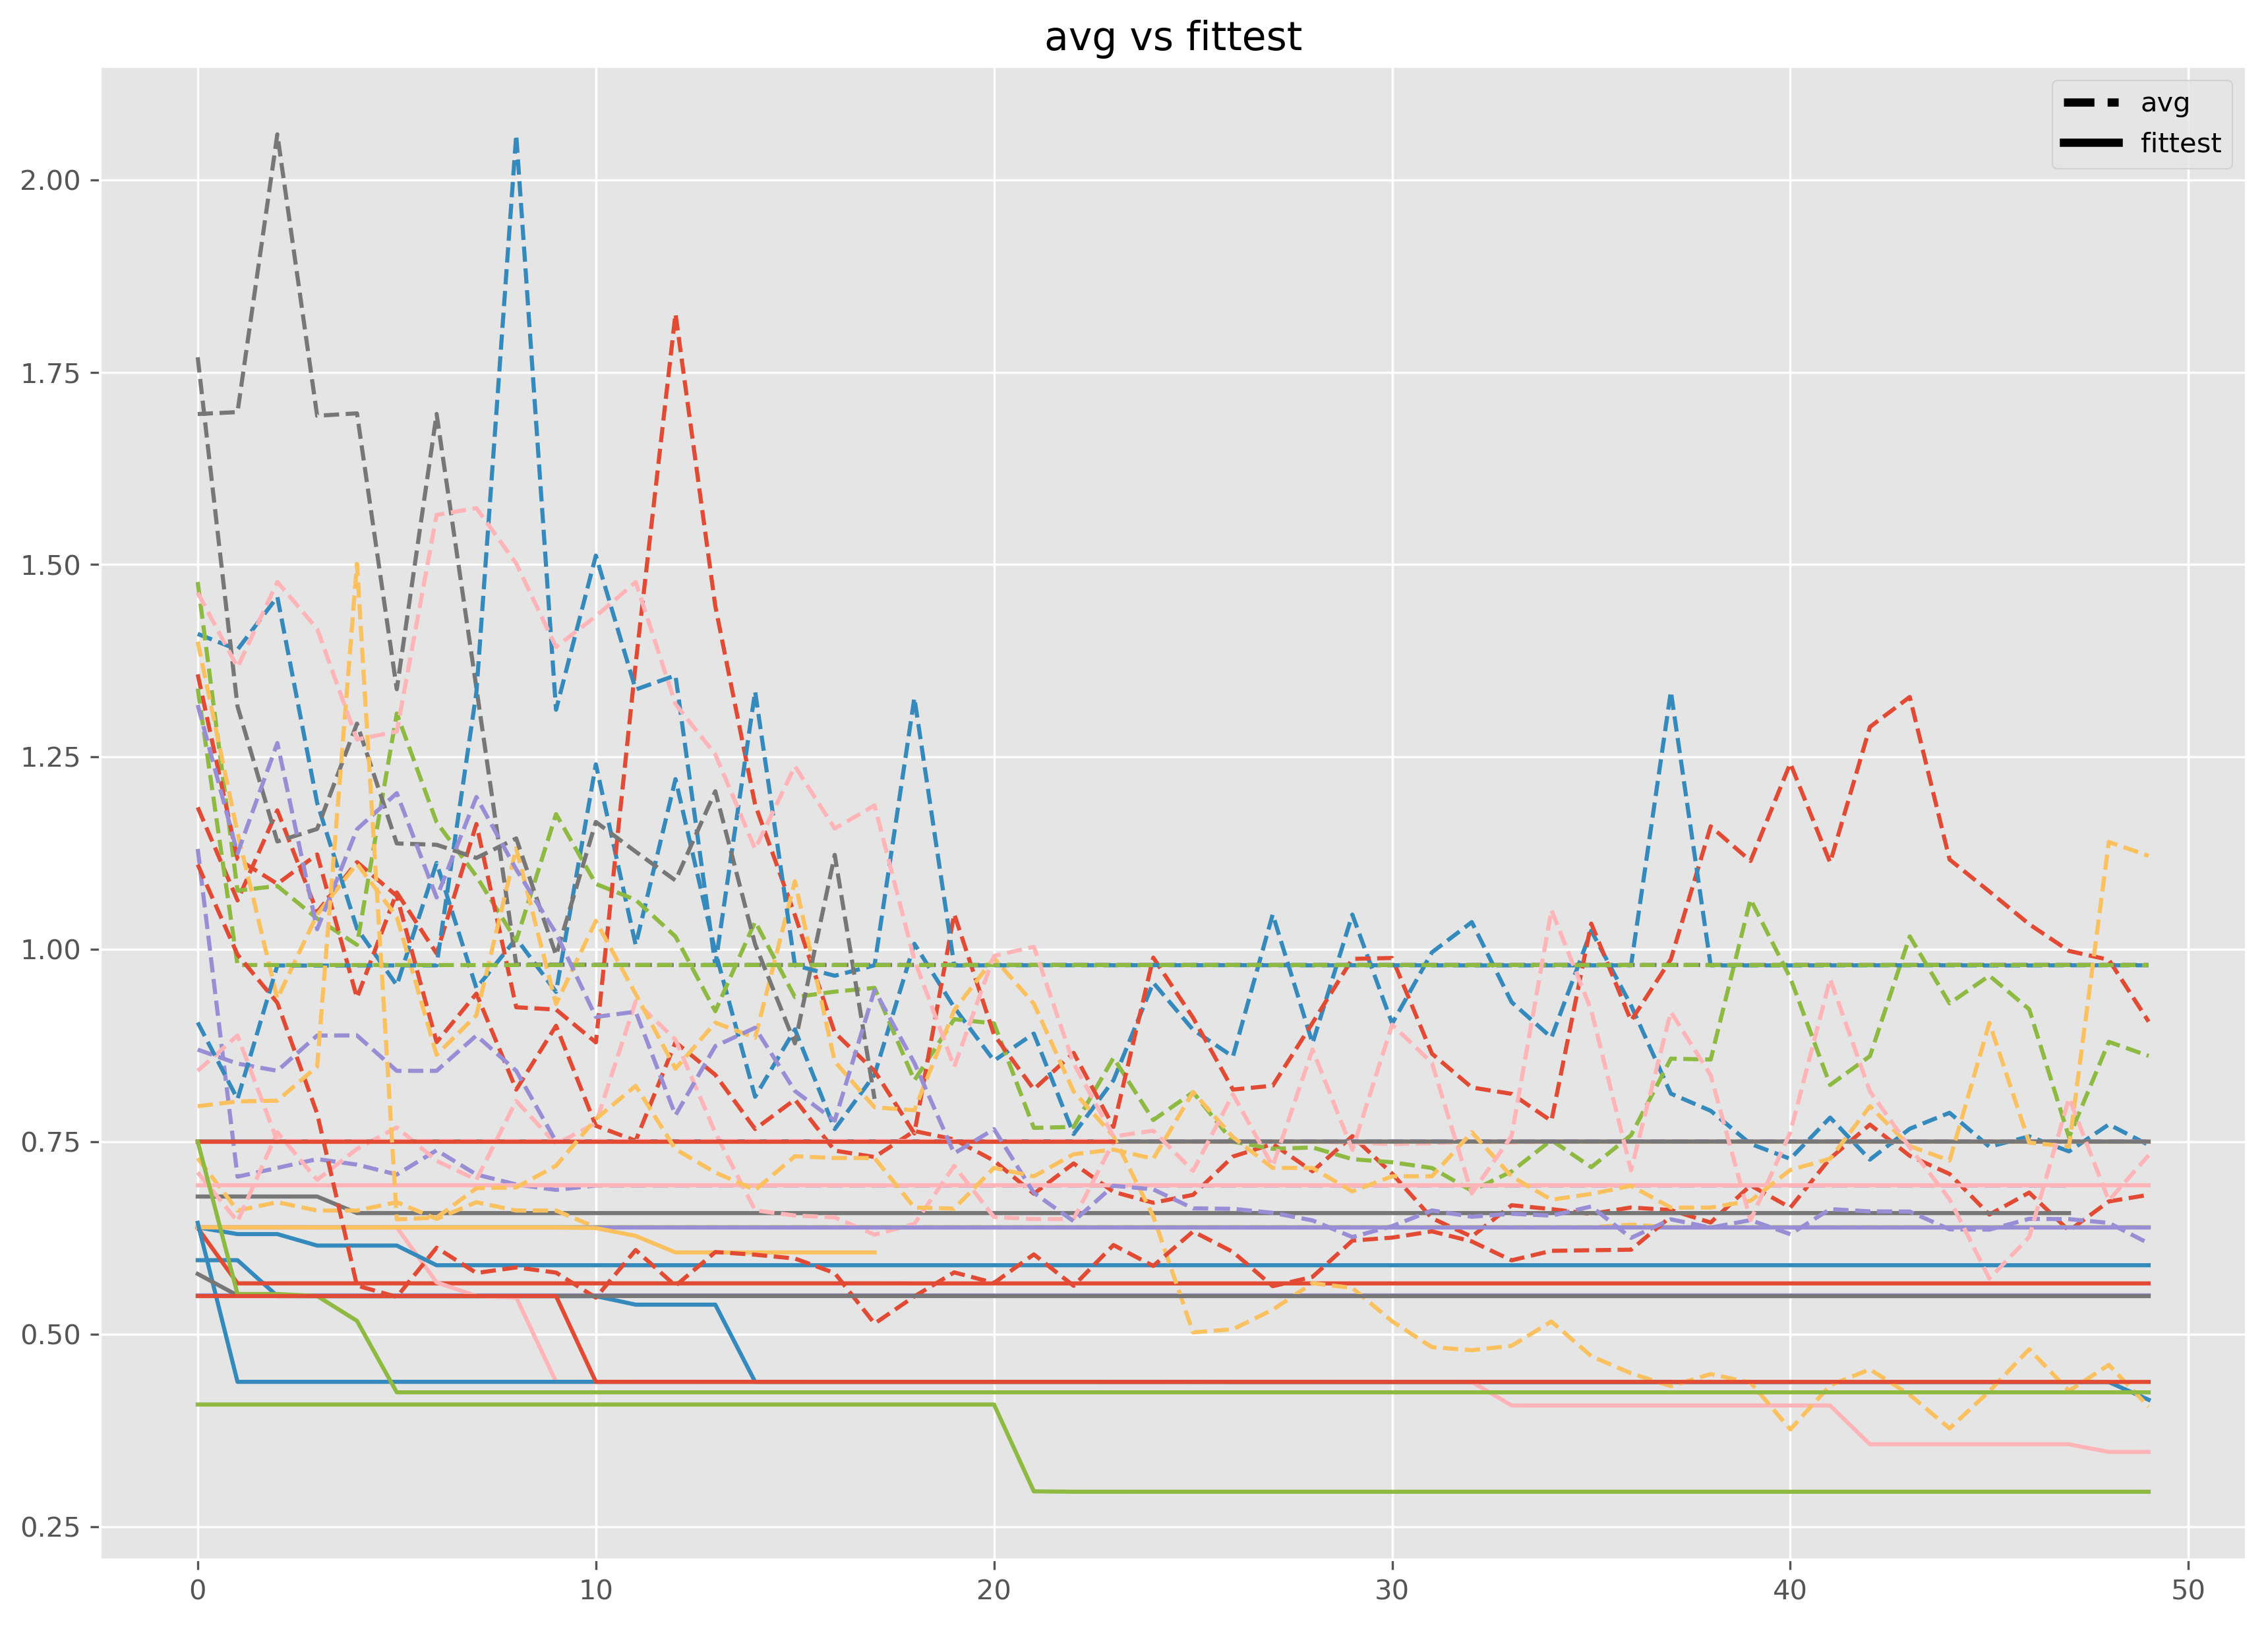

In [7]:
# Pete's log dir
log_dir = '/home/fpga/Git/varro-test/logs/grid-search-2021-02-03'
target_logs = os.listdir(log_dir)


import os
import sys
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (14, 10)
plt.style.use("ggplot")
import pandas as pd
import pickle
import numpy as np
import re
def display_fitness_scores(
    log_file_path="../varro-sean/logs/varro/algo/experiments/simple_step_2020-Nov-05-22:05:34.log",
):
    """Displays a matplotlib scatter plot of average population fitness scores and fittest
    individual fitness score over generations from log file
    Args:
        log_file_path (str): Path to log file
    """
    file = open(
        log_file_path,
        "r",
    )
    lines = [
        line
        for line in file.read().splitlines()
        if ("generation" in line.lower()) and ("|" in line.lower())
    ]
    experiment_info = [
        line
        for line in file.read().splitlines()
        if ("generation" not in line.lower()) and ("|" in line.lower())
    ]
    file.close()
    fitness_scores = list(
        zip(
            *[
                [
                    (
                        int(line.split("|")[1].strip().split(" ")[1]),
                        float(line.split("|")[2].strip().split(":")[-1].strip()),
                    ),
                    (
                        int(line.split("|")[1].strip().split(" ")[1]),
                        float(line.split("|")[3].strip().split(":")[-1].strip()),
                    ),
                ]
                for line in lines
            ]
        )
    )
    avg_fitness, fittest_ind_fitness = fitness_scores[0], fitness_scores[1]
    return avg_fitness, fittest_ind_fitness

avgs = []
fittest = []
log_loss = []
gmin = 100000

for target in target_logs:
#     import pdb;pdb.set_trace()
    a, f = display_fitness_scores(log_file_path=os.path.join(log_dir, target))
    a = np.array(a)
    f = np.array(f)
    
    avgs.append(a)
    fittest.append(f)
    
    lmin = np.min(f[:,1])
    
    if lmin < gmin:
        gmin = lmin
        print(lmin, target)
        
for i in range(len(avgs)):    
    plt.plot(avgs[i][:, 1], ls="--")
    plt.plot(fittest[i][:, 1], ls="-")
    
lines = [
    Line2D([0], [0], color="black", linewidth=3, linestyle="--"),
    Line2D([0], [0], color="black", linewidth=3, linestyle="-"),
]

labels = ["avg", "fittest"]
plt.legend(lines, labels)
plt.title("avg vs fittest")

In [3]:
a

NameError: name 'a' is not defined